In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys

In [4]:
data_dir = '/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random'
data_dir_test = '/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random/test/'
root = 'galaxies_blended_20191024'

In [5]:
dfs = []

dfs.append(pd.read_csv(os.path.join(data_dir_test, root+'_0_data.csv')))
df = dfs[0]

for df2 in dfs[1:]:
    df = df.append(df2)

In [6]:
test_img = np.load(data_dir+'/test/galaxies_blended_20191024_0_images.npy', mmap_mode = 'c')
training_img = np.load(data_dir+'/training/galaxies_blended_20191024_0_images.npy', mmap_mode = 'c')

test_data = pd.read_csv(data_dir+'/test/galaxies_blended_20191024_0_data_classified.csv')
training_data = pd.read_csv(data_dir+'/training/galaxies_blended_20191024_0_data_classified.csv')

In [7]:
test_img.shape, training_img.shape

((10000, 2, 10, 64, 64), (10000, 2, 10, 64, 64))

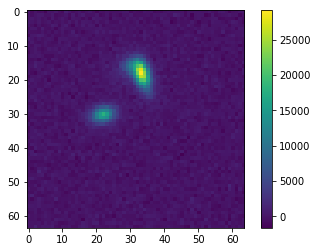

In [8]:
plt.imshow(test_img[3,1,6])
plt.colorbar()

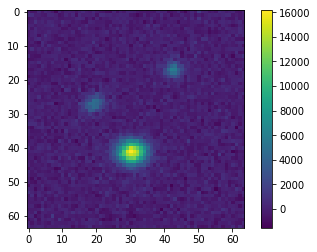

In [9]:
plt.imshow(training_img[3,1,6])
plt.colorbar()

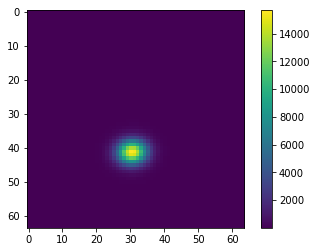

In [10]:
plt.imshow(training_img[3,0,6])
plt.colorbar()

In [11]:
shifts = np.load('/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random/training/shifts/galaxies_blended_20191024_0_shifts.npy')

In [12]:
shifts.shape

(10000, 4, 2)

In [13]:
def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

In [14]:
list_of_shifts = [x for x in listdir_fullpath(os.path.join(data_dir,'training','shifts')) if x.endswith('.npy')]

In [15]:
list_of_shifts

['/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random/training/shifts/galaxies_blended_20191024_4_shifts.npy',
 '/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random/training/shifts/galaxies_blended_20191024_0_shifts.npy',
 '/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random/training/shifts/galaxies_blended_20191024_7_shifts.npy',
 '/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random/training/shifts/galaxies_blended_20191024_9_shifts.npy',
 '/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random/training/shifts/galaxies_blended_20191024_2_shifts.npy',
 '/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random/training/shifts/galaxies_blended_20191024_8_shifts.npy',
 '/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random/training/shifts/galaxies_blended_20191024_5_shifts.npy',
 '/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random/training/

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
Unnamed: 0    10000 non-null int64
redshift_0    10000 non-null float64
e1_0          10000 non-null float64
e2_0          10000 non-null float64
mag_0         10000 non-null float64
redshift_1    10000 non-null float64
e1_1          10000 non-null float64
e2_1          10000 non-null float64
mag_1         10000 non-null float64
redshift_2    10000 non-null float64
e1_2          10000 non-null float64
e2_2          10000 non-null float64
mag_2         10000 non-null float64
redshift_3    10000 non-null float64
e1_3          10000 non-null float64
e2_3          10000 non-null float64
mag_3         10000 non-null float64
dtypes: float64(16), int64(1)
memory usage: 1.3 MB


In [17]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
Unnamed: 0    10000 non-null int64
redshift_0    10000 non-null float64
e1_0          10000 non-null float64
e2_0          10000 non-null float64
mag_0         10000 non-null float64
redshift_1    10000 non-null float64
e1_1          10000 non-null float64
e2_1          10000 non-null float64
mag_1         10000 non-null float64
redshift_2    10000 non-null float64
e1_2          10000 non-null float64
e2_2          10000 non-null float64
mag_2         10000 non-null float64
redshift_3    10000 non-null float64
e1_3          10000 non-null float64
e2_3          10000 non-null float64
mag_3         10000 non-null float64
dtypes: float64(16), int64(1)
memory usage: 1.3 MB


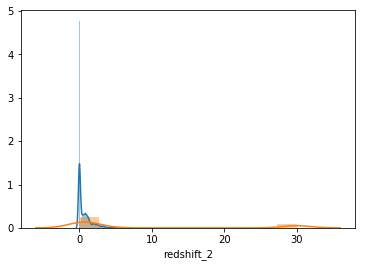

In [18]:
sns.distplot(test_data['redshift_2'])
sns.distplot(training_data['redshift_2'])

In [19]:
# Import necessary librairies

import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
import sys
import os
import logging
import galsim
import random
import cmath as cm
import math
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.layers import Input, Dense, Lambda, Layer, Add, Multiply, Reshape, Flatten, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, Dropout, MaxPool2D, Flatten,  Reshape, UpSampling2D, Cropping2D, Conv2DTranspose, PReLU, Concatenate, Lambda, BatchNormalization, concatenate, LeakyReLU

import tensorflow_probability as tfp


from importlib import reload
import sys
import os
sys.path.insert(0,'../../../conditional_VAE/scripts/tools_for_VAE/')
import tools_for_VAE.layers as layers
from tools_for_VAE import utils, vae_functions, generator, model

In [20]:
class SampleMultivariateGaussian(Layer):
    """
    Samples from a multivariate Gaussian given a mean and a full covariance matrix or just diagonal std.
    """

    def __init__(self, full_cov, add_KL, return_KL, coeff_KL=1.0, *args, **kwargs):
        """
        full_cov: whether to use a full covariance matrix or just the diagonal.
        add_KL: boolean, whether to add the (sample average) KL divergence of the input distribution with respect to a standard Gaussian
        return_KL: whether to return the value of the KL divergence (one value per sample).
        """
        self.full_cov = full_cov
        self.add_KL = add_KL
        self.return_KL = return_KL
        self.coeff_KL = coeff_KL

        if full_cov:
            self.distrib = tfp.distributions.MultivariateNormalFullCovariance
        else:
            self.distrib = tfp.distributions.MultivariateNormalDiag

        super(SampleMultivariateGaussian,
              self).__init__(*args, **kwargs)

    def call(self, inputs):
        """
        inputs = if full_cov is True, [mu, cov] where mu is the mean vector and cov the covariance matrix, otherwise [mu,sigma] where sigma is the std.
        """
        if self.full_cov:
            z_mu, z_cov = inputs
            dist_z = self.distrib(loc=z_mu, covariance_matrix=z_cov)
            dist_0 = self.distrib(
                loc=tf.zeros_like(z_mu), covariance_matrix=tf.identity(z_cov))

        else:
            z_mu, z_sigma = inputs
            dist_z = self.distrib(loc=z_mu, scale_diag=z_sigma)
            dist_0 = self.distrib(loc=tf.zeros_like(
                z_mu), scale_diag=tf.ones_like(z_sigma))

        z = dist_z.sample()
        
        if self.add_KL or self.return_KL:
            kl_divergence = tfp.distributions.kl_divergence(
                dist_z, dist_0, name='KL_divergence_full_cov')
            if self.add_KL:
                self.add_loss(self.coeff_KL*K.mean(kl_divergence), inputs=inputs)
            if self.return_KL:
                return z, kl_divergence

        return z

    def compute_output_shape(self, input_shape):
        """
        Same shape as the mean vector
        """
        return input_shape[0]


In [228]:
#### Create encooder
def build_model(latent_dim, hidden_dim, filters, kernels,nb_of_bands, conv_activation=None, dense_activation=None):#'sofplus'
    """
    Return encoder as model
    latent_dim : dimension of the latent variable
    hidden_dim : dimension of the dense hidden layer
    filters: list of the sizes of the filters used for this model
    list of the size of the kernels used for each filter of this model
    conv_activation: type of activation layer used after the convolutional layers
    dense_activation: type of activation layer used after the dense layers
    nb_of bands : nb of band-pass filters needed in the model
    """
    input_layer = Input(shape=(64,64,nb_of_bands))
    parameters = Input(shape=(5))
    input_shape = (64, 64, nb_of_bands)

    #h = Reshape((64,64,nb_of_bands))(input_layer)
    h = BatchNormalization()(input_layer)
    for i in range(len(filters)):
        h = Conv2D(filters[i], (kernels[i],kernels[i]), activation=conv_activation, padding='same')(h)
        h = PReLU()(h)
        h = h + Conv2D(filters[i], (kernels[i],kernels[i]), activation=conv_activation, padding='same')(h)
        h = PReLU()(h)
        h = h + Conv2D(filters[i], (kernels[i],kernels[i]), activation=conv_activation, padding='same')(h)
        h = PReLU()(h)

        h = Conv2D(filters[i], (kernels[i],kernels[i]), activation=conv_activation, padding='same', strides=(2,2))(h)
        h = PReLU()(h)
    h = Flatten()(h)
    #h = tf.keras.layers.concatenate([h,parameters])
    #h = PReLU()(h)
    h = Dense(hidden_dim, activation=dense_activation)(h)
    h = PReLU()(h)
    #h = tf.keras.layers.concatenate([h,parameters])
    mu = Dense(latent_dim)(h)
    sigma = Dense(latent_dim, activation='softplus')(h)
    
    z, Dkl = SampleMultivariateGaussian(full_cov=False, add_KL=False, return_KL=True, coeff_KL=0)([mu, sigma])
    z_conc = tf.keras.layers.concatenate([z,parameters])

    h = Dense(hidden_dim, activation=dense_activation)(z_conc)
    h = PReLU()(h)
    w = int(np.ceil(input_shape[0]/2**(len(filters))))
    h = Dense(w*w*filters[-1], activation=dense_activation)(h)
    h = PReLU()(h)
    h = Reshape((w,w,filters[-1]))(h)
    for i in range(len(filters)-1,-1,-1):
        h = Conv2DTranspose(filters[i], (kernels[i],kernels[i]), activation=conv_activation, padding='same', strides=(2,2))(h)
        h = PReLU()(h)
        h = h + Conv2DTranspose(filters[i], (kernels[i],kernels[i]), activation=conv_activation, padding='same')(h)
        h = PReLU()(h)
        h = h + Conv2DTranspose(filters[i], (kernels[i],kernels[i]), activation=conv_activation, padding='same')(h)
        h = PReLU()(h)

        h = Conv2DTranspose(filters[i], (kernels[i],kernels[i]), activation=conv_activation, padding='same')(h)
        h = PReLU()(h)
    h = Conv2D(input_shape[-1], (3,3), activation=None, padding='same')(h)#'sigmoid'
    h = PReLU()(h)
    cropping = int(h.get_shape()[1]-input_shape[0])
    if cropping>0:
        print('in cropping')
        if cropping % 2 == 0:
            h = Cropping2D(cropping/2)(h)
        else:
            h = Cropping2D(((cropping//2,cropping//2+1),(cropping//2,cropping//2+1)))(h)

    return Model([input_layer,parameters], h) , Dkl

In [229]:
batch_size = 100
latent_dim = 32
epochs = 10
load = 'false'
bands = [4,5,6,7,8,9]
nb_of_bands = len(bands)
hidden_dim = 256
filters = [32, 64, 128, 256]#, 1024]
kernels = [3,3,3,3]#, 3]


vae, Dkl = build_model(latent_dim, hidden_dim, filters, kernels,nb_of_bands)

In [230]:
path_output = '/sps/lsst/users/barcelin/weights/c-VAE/mse/'
latest = tf.train.latest_checkpoint(path_output)
vae.load_weights(latest)

In [150]:
training_img[:100,0,4:].shape

(100, 6, 64, 64)

In [151]:
np.transpose(training_img[:100,0,4:], axes = (0,2,3,1)).shape

(100, 64, 64, 6)

In [152]:
reload(generator)

<module 'tools_for_VAE.generator' from '../../../conditional_VAE/scripts/tools_for_VAE/tools_for_VAE/generator.py'>

In [153]:
images_dir = '/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random/'

list_of_samples = [x for x in utils.listdir_fullpath(os.path.join(images_dir,'training')) if x.endswith('.npy')]
list_of_shifts = [x for x in utils.listdir_fullpath(os.path.join(images_dir,'training','shifts')) if x.endswith('.npy')]

list_of_samples_val = [x for x in utils.listdir_fullpath(os.path.join(images_dir,'validation')) if x.endswith('.npy')]
list_of_shifts_val = [x for x in utils.listdir_fullpath(os.path.join(images_dir,'validation','shifts')) if x.endswith('.npy')]

training_generator = generator.BatchGenerator(bands, list_of_samples, list_of_shifts, total_sample_size=None,
                                    batch_size=batch_size, 
                                    trainval_or_test='training',
                                    do_norm=False,
                                    denorm = False,
                                    path = os.path.join(images_dir, "test/"),
                                    list_of_weights_e=None)

validation_generator = generator.BatchGenerator(bands, list_of_samples_val,list_of_shifts_val, total_sample_size=None,
                                    batch_size=batch_size, 
                                    trainval_or_test='validation',
                                    do_norm=False,
                                    denorm = False,
                                    path = os.path.join(images_dir, "test/"),
                                    list_of_weights_e= None)

[BatchGenerator] total_sample_size =  100000
[BatchGenerator] len(list_of_samples) =  10
[BatchGenerator] total_sample_size =  20000
[BatchGenerator] len(list_of_samples) =  2


In [369]:
img = training_generator.__getitem__(2)

In [107]:
#img[2]

In [108]:
shifts = np.load('/sps/lsst/users/barcelin/data/TFP/GalSim_COSMOS/blended_galaxies/random/training/shifts/galaxies_blended_20191024_3_shifts.npy', mmap_mode = 'c')

In [109]:
shifts[5877, 0]

memmap([-1.27680803, -0.80969562])

In [110]:
img[0][0].shape, img[0][1].shape

((100, 64, 64, 6), (100, 5))

In [111]:
img[0][1][0]

array([0.13850653, 0.57176918, 0.29260001, 0.19210587, 2.3984043 ])

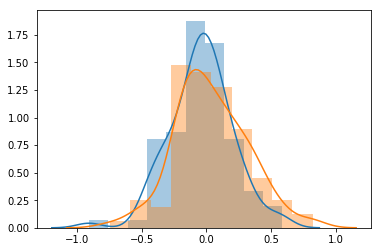

In [112]:
sns.distplot(img[0][1][:,0], bins = 10)
sns.distplot(img[0][1][:,1], bins = 10)

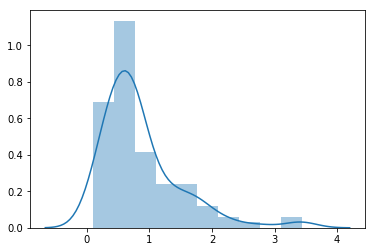

In [113]:
sns.distplot(img[0][1][:,2], bins = 10)

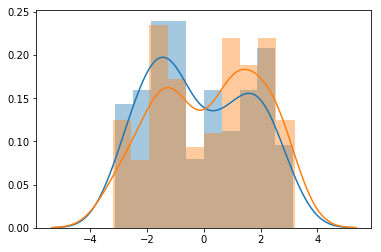

In [114]:
sns.distplot(img[0][1][:,3], bins = 10)
sns.distplot(img[0][1][:,4], bins = 10)

In [115]:
np.min(img[0][1][:,4])/0.2

-15.955700534245072

In [116]:
img[0][1][0,3], img[0][1][0,4]

(0.19210587282457592, 2.3984043017508636)

0
1
2
3
4
5
6
7
8
9


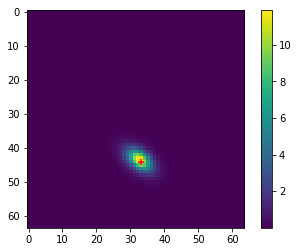

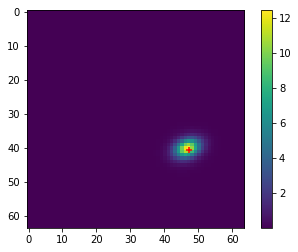

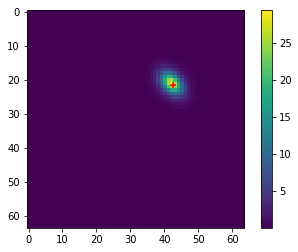

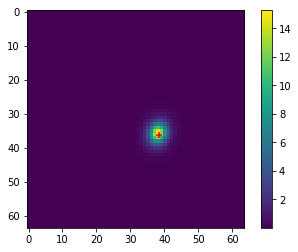

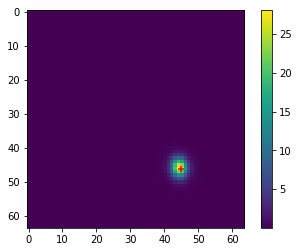

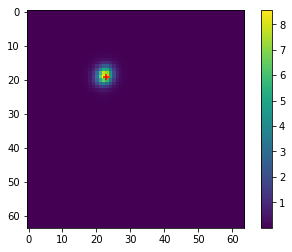

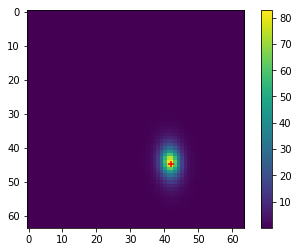

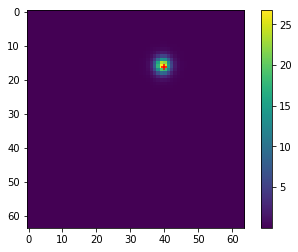

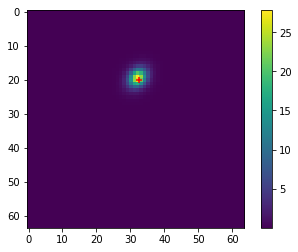

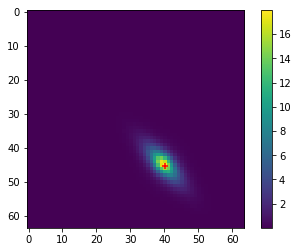

In [117]:
for i in range (10):
    print(i)
    fig = plt.figure()
    plt.imshow(img[0][0][i,:,:,2])
    plt.colorbar()
    plt.scatter((32+img[0][1][i,3]/0.2), (32+img[0][1][i,4]/0.2), c = 'r', marker = '+')

In [414]:
path_output = '/sps/lsst/users/barcelin/weights/c-VAE/mse/'
latest = tf.train.latest_checkpoint(path_output)
vae.load_weights(latest)

In [415]:
out = vae(img[0])

In [416]:
out.shape

TensorShape([100, 64, 64, 6])

In [417]:
np.max(out)

569.4131

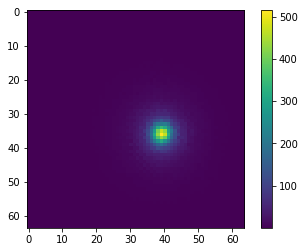

In [418]:
plt.imshow(out[0,:,:,2])
plt.colorbar()

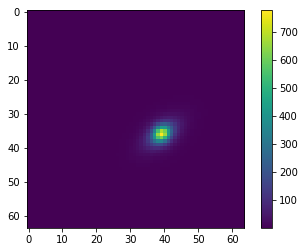

In [419]:
plt.imshow(img[0][0][0,:,:,2])
plt.colorbar()

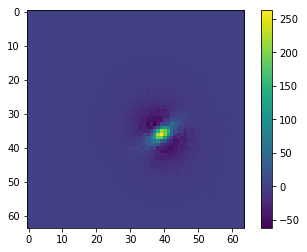

In [420]:
plt.imshow(img[0][0][0,:,:,2]-out[0,:,:,2])
plt.colorbar()